In [124]:
%load_ext autoreload
%autoreload 2

In [92]:
# set up working directory
import os
# check working directory
os.getcwd()
print(os.getcwd())


# load dataset commercial_nac65.csv and nacc_processed.csv from data/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from econml.dml import LinearDML
from sklearn.linear_model import LassoCV
from econml.inference import BootstrapInference
from econml.dml import NonParamDML
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# load dataset


/Users/duche/Documents/Travail/Hackathon/EF Bio&Tech/biohack/notebook


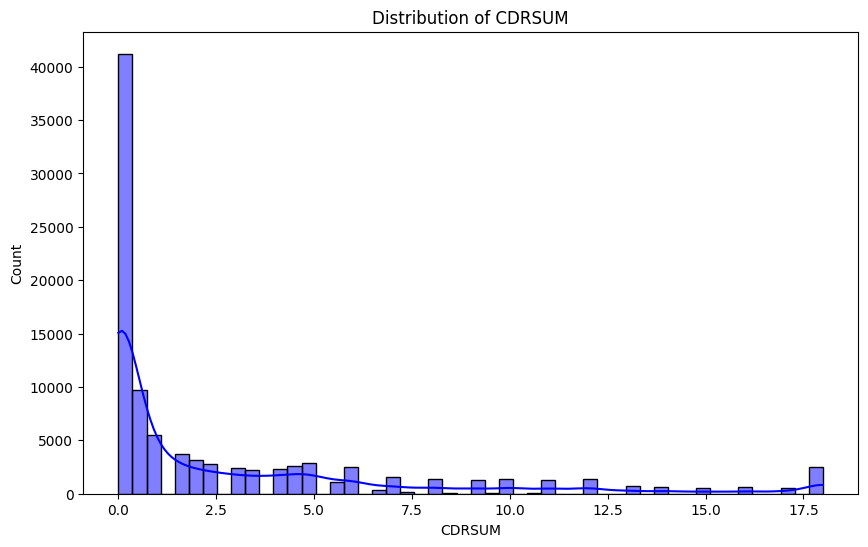

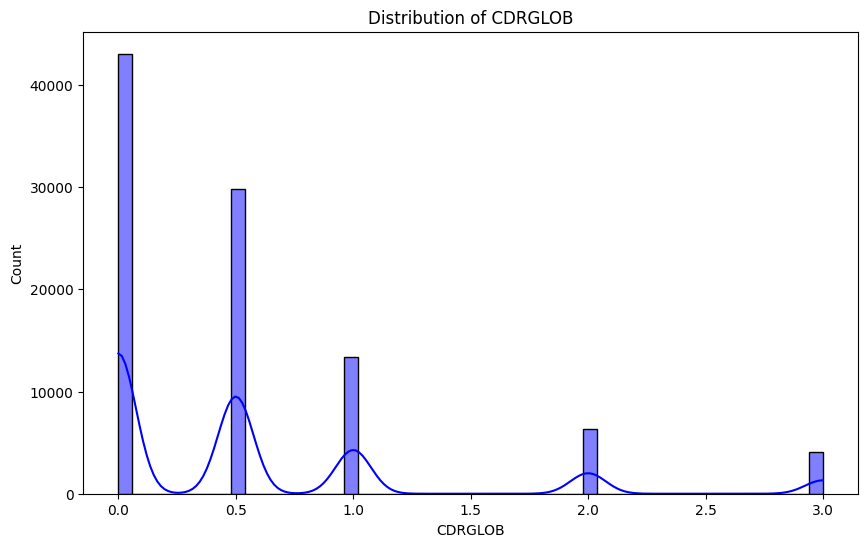

In [93]:
# show distrib of CDRSUM and CDRGLOB
plt.figure(figsize=(10, 6))
sns.histplot(df['CDRSUM'], bins=50, kde=True, color='blue')
plt.title('Distribution of CDRSUM')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['CDRGLOB'], bins=50, kde=True, color='blue')
plt.title('Distribution of CDRGLOB')
plt.show()

In [94]:
test_molecules = ['DB00563', 'DB00434', 'DB00541', 'DB01204', 'DB01620']
rating_mat = pd.read_csv('../data/PREDICT/ratings_mat.csv', index_col=0)

In [95]:
rating_mat.head()

,C0029458,C0008311,C0040560,C0026961,C0238344,C0004238,C1843687,C0007131,C0004352,C0553580,...,C0036474,C2675609,C0042847,C0036980,C1840172,C1851428,C1848533,C1835044,C1866993,C1704272
DB00420,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DB00210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DB00248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DB00230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DB00666,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
test_molecules_set = set(test_molecules)

rating_mat_filtered = rating_mat[rating_mat.index.isin(test_molecules_set)]
diseases = {}
for molecule in test_molecules:
    diseases[molecule]= rating_mat_filtered.loc[molecule][rating_mat_filtered.loc[molecule] == 1].index.tolist()

#### Causal inference 

In this part, we assume that patients that have symptoms of a disease are very likely to be treated.
We realise the following treatment groups: 
- patients that have Alzheimer and are treated
- patients that have Alzheimer and are not treated

In [97]:
outcomes = ['CDRSUM']
treatment = ['PD']

df = pd.read_csv('../data/nacc_processed.csv')

cofounders = df.columns.difference(outcomes + treatment).tolist()
df = df[df['PD'] != 'Missing']
df['NACCNIHR'] = df['NACCNIHR'].astype('category')
df['NACCNIHR'] = df['NACCNIHR'].cat.codes


Columns (2,42,98) have mixed types. Specify dtype option on import or set low_memory=False.


In [98]:
df = df.drop(columns=['NACCID'])
### convert Missing to 0
df = df.replace('Missing', 0)
df = df.astype(float)


In [99]:
est = LinearDML(model_y=LassoCV(), model_t=LassoCV())

In [9]:

cofounders_name = ['NACCADC', 'NACCID', 'NACCNIHR', 'MEMANTINE', 'DONEPEZIL',
       'RIVASTIGMINE', 'GALANTAMINE', 'VISIT', 'SEX', 'NACCNRYR', 'EDUC',
       'INDEPEND', 'INLIVWTH', 'NACCFAM', 'NACCAM', 'NACCFFTD', 'NACCAMD',
       'NACCAHTN', 'NACCHTNC', 'NACCACEI', 'NACCAAAS', 'NACCBETA',
       'NACCCCBS', 'NACCDIUR', 'NACCVASD', 'NACCANGI', 'NACCLIPL',
       'NACCNSD', 'NACCAC', 'NACCADEP', 'NACCAPSY', 'NACCAANX',
       'NACCPDMD', 'NACCEMD', 'NACCDBMD', 'SMOKYRS', 'CVHATT', 'CBSTROKE',
       'CBTIA', 'PD', 'TBI', 'DIABETES', 'HYPERTEN', 'HYPERCHO', 'B12DEF',
       'THYROID', 'ARTHRIT', 'ALCOHOL', 'ABUSOTHR', 'PTSD', 'BIPOLAR',
       'SCHIZ', 'DEPOTHR', 'ANXIETY', 'OCD', 'NPSYDEV', 'NACCBMI',
       'BPSYS', 'VISION', 'HEARING', 'SOMATIC', 'EMOT', 'HXHYPER',
       'FOCLSIGN', 'HACHIN', 'CVDCOG', 'CVDIMAG1', 'PDNORMAL', 'CDRGLOB',
       'MEMORY', 'ORIENT', 'JUDGMENT', 'CDRSUM', 'COMPORT', 'CDRLANG',
       'DELSEV', 'HALLSEV', 'AGITSEV', 'DEPDSEV', 'ANXSEV', 'ELATSEV',
       'APASEV', 'DISNSEV', 'IRRSEV', 'MOTSEV', 'NITESEV', 'APPSEV',
       'NORMEXAM', 'ALSFIND', 'DECCLIN', 'COGMODE', 'MOMODE', 'NACCMMSE',
       'NACCMOCA', 'COGSTAT', 'NACCUDSD', 'AMYLCSF', 'CSFTAU', 'EPILEP',
       'SEIZURES', 'HIV', 'OTHCOG', 'DEP', 'NACCGDS', 'BIPOLDX',
       'SCHIZOP', 'ANXIET', 'DELIR', 'PTSDDX', 'OTHPSY', 'ALCDEM',
       'DYSILL', 'MEDS', 'FAQ', 'SLEEP']

### remove treatment and outcomes from cofounders_name




In [148]:
instrumental_variables = [
    "BPSYS",  # Systolic blood pressure [70,230]
    "CBSTROKE",  # epileptic seizure [0 1 2 9 -4] (infarctus du myocarde)
    "HYPERTEN",  # Hypertension[0 1 2 9 -4]
    "NACCCCBS",  # calcium channel blocker [0 1 -4]
    "NACCADC",  # ADC at which the patient was diagnosed
    "EPILEP",  # epileptic seizure [0 1 2 9 -4]
]
confounders = [
    "VISIT",
    "INDEPEND",  # Independence score 1 - 4
    "INLIVWTH",  # In-living with partner (binary)
    "NACCAC",  # anticoagulant [0 1 -4]
    "NACCBETA",  # Beta blocker [0 1 -4]
    "NACCADEP",  # antidepressant [0 1 -4]
    "NACCPDMD",  # antiparkinson agent [0 1 -4]
    "CVDCOG",  # Cerebrovascular disease contributing to cognitive impairment [0 1 8 -4]
    "NACCMOCA",  # MoCA Total Score — corrected for education
    "NACCMMSE",  # Mini-Mental State Examination
    "FAQ",  # Functional Activities Questionnaire
    "NACCGDS",  # Geriatric Depression Scale
    "CDRGLOB",  # Global CDR®
]
outcome_predictors = [
    "NACCNIHR",
    "SEX",
    "EDUC",
    "NACCBMI",
    "TBI",
    "NACCAPSY",  # antipsychotic [0 1 -4]
    "DEPOTHR",  # Past depression episodes
    "NACCFAM",  # Family member with cognitive impairment
    "NACCFFTD",  # Family FLTD mutation
    "MEDS",  # COG IMPAIRMENT DUE TO Medications
    "ALCDEM",  # Alcohol-related dementia
    "PD",  # Parkinson's disease diagnosis
    "ALSFIND",  # ALS suspicion
    "PTSD",  # Post-traumatic Stress Disorder (3 levels: 0, 1, 2)
    "BIPOLAR",  # Bipolar disorder (3 levels: 0, 1, 2)
    "SCHIZ",  # Schizophrenia (3 levels: 0, 1, 2)
    "ANXIETY",  # Anxiety (3 levels: 0, 1, 2)
    "ALCOHOL",  # Alcohol (3 levels: 0, 1, 2)
    "NPSYDEV",  # Developmental neuropsychiatric disorders (3 levels: 0, 1, 2)
    "DELIR",  # Delirium (binary)
    "PTSDDX",  # PTSD with depression (binary)
    "COGMODE",  # COG MODE OF ONSET (ordinal)
    "MOMODE",  # MO MODE OF ONSET (ordinal)
    "JUDGMENT",  # Judgment and problem-solvin (ordinal but has 0.5 status -> continuous)
    "CDRSUM",  # CDR® sum of boxes (score 0 - 18)
    "COMPORT",  # Behavior, comportment, and personality (ordinal but has 0.5 status -> continuous)
    "CDRLANG",  # Language (ordinal but has 0.5 status -> continuous)
    "DECCLIN",  # Clinician believes there is a meaningful decline in memory,
    # non-memory cognitive abilities, behavior, ability to manage his/her affairs,
    # or there are motor/movement changes (binary)
]



In [149]:
Y = df['CDRSUM']
T = df['PD']

X = df[outcome_predictors]
W = df[confounders]
Z = df[instrumental_variables]

## convert to numpy
Y = Y.to_numpy()
T = T.to_numpy()
X = X.to_numpy()
W = W.to_numpy()
Z = Z.to_numpy()


In [161]:
Z.shape

<Axes: ylabel='Count'>

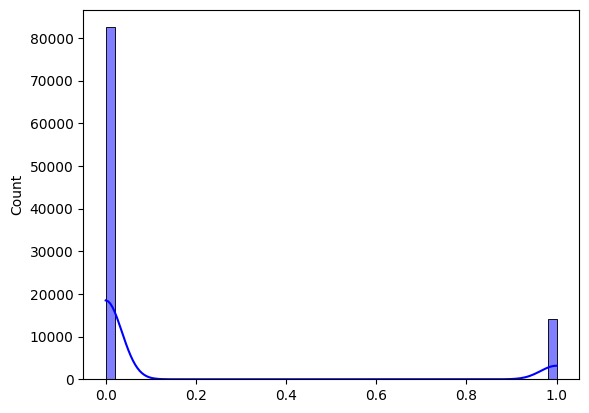

In [143]:
Y.shape, T.shape, W.shape, X.shape, Z.shape

In [153]:
from econml.dml import NonParamDML
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

est = NonParamDML(model_y=RandomForestRegressor(),
                  model_t=RandomForestClassifier(),
                  model_final=RandomForestRegressor(),
                  discrete_treatment=True)
est.fit(Y, T, X=X, W=W) 

In [155]:
treatment_effects = est.effect(X)

In [157]:
np.mean(treatment_effects)

In [159]:
from econml.iv.dml import OrthoIV

est = OrthoIV(projection=False, 
              discrete_treatment=True, 
              discrete_instrument=False)
est.fit(Y, T, Z=Z, X=X, W=W)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

In [167]:
treatment_effects = est.effect(X)
lb, ub = est.effect_interval(X, alpha=0.05) # OLS confidence intervals

In [169]:
print(np.mean(treatment_effects))

-0.035237515137739275


In [171]:
np.mean(lb), np.mean(ub)

In [ ]:
treatment_effects = est.effect(X_test)